In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import time
import functools

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [18]:
def load_img(path_to_img, target_size=None, max_dim=512):
    img = PIL.Image.open(path_to_img)
    img = img.convert('RGB')
    if target_size:
        img = img.resize(target_size)
    else:
        long = max(img.size)
        scale = max_dim / long
        img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)))
    img = np.array(img)
    img = img.astype(np.float32)[np.newaxis, ...] / 255.0
    return tf.constant(img)

content_image = load_img("monkey.jpg")
style_image = load_img("abstract_art.jpg")


In [4]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
        
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')

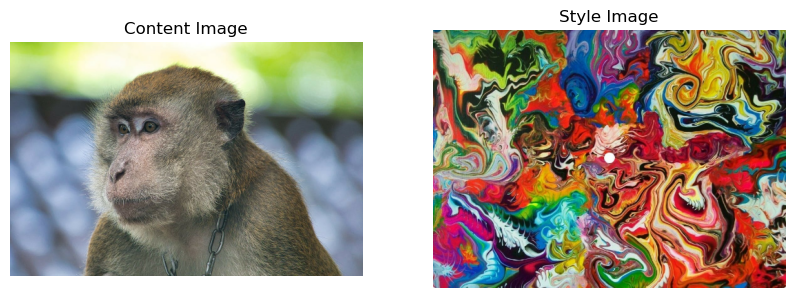

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
imshow(content_image, 'Content Image')
plt.subplot(1,2,2)
imshow(style_image, 'Style Image')

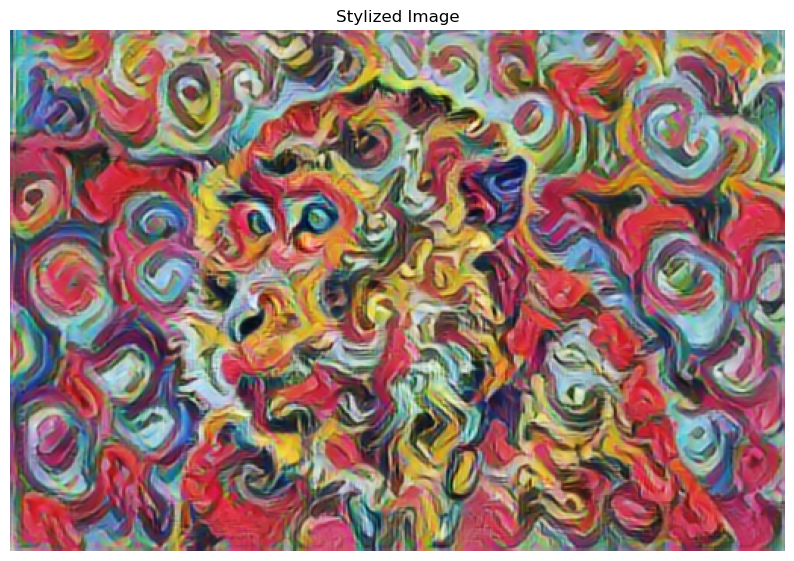

In [6]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

plt.figure(figsize=(10,10))
imshow(stylized_image, 'Stylized Image')

In [7]:
def create_stylized_image(content_image_jpg, style_image_jpg):
  content_image = load_img(content_image_jpg)
  style_image = load_img(style_image_jpg)

  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  imshow(content_image, 'Content Image')
  plt.subplot(1,2,2)
  imshow(style_image, 'Style Image')

  hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

  stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

  plt.figure(figsize=(10,10))
  imshow(stylized_image, 'Stylized Image')


### Investigation: 
1. Reversing Style Image as a realistic photo and Content Image as cartoon
2. Having both Content Image and Style Image as realistic
3. Having both Content Image and Style Image as abstract
4. Using the same photo as Content Image and Style Image
5. Using a blend of 2 Style Images as a Blended Style Image  

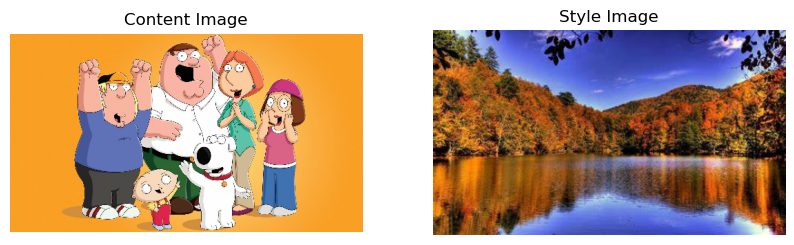

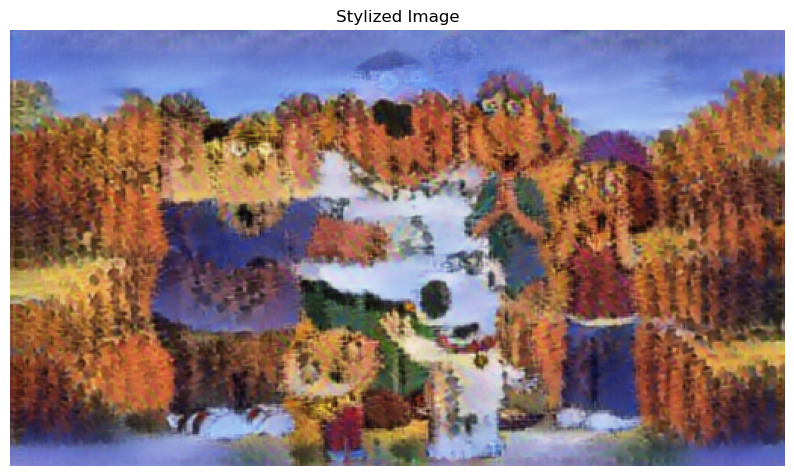

In [8]:
family_guy_content = "family_guy.jpg"
landscape_style = "landscape.jpg"
create_stylized_image(family_guy_content, landscape_style)

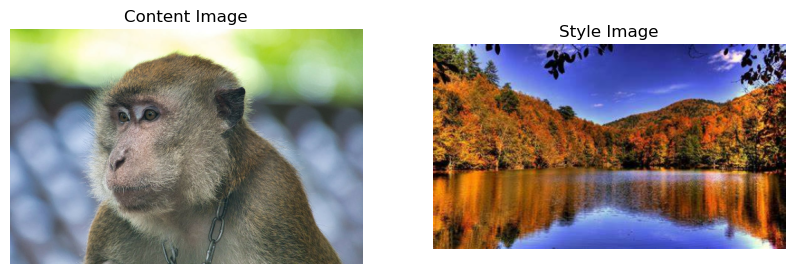

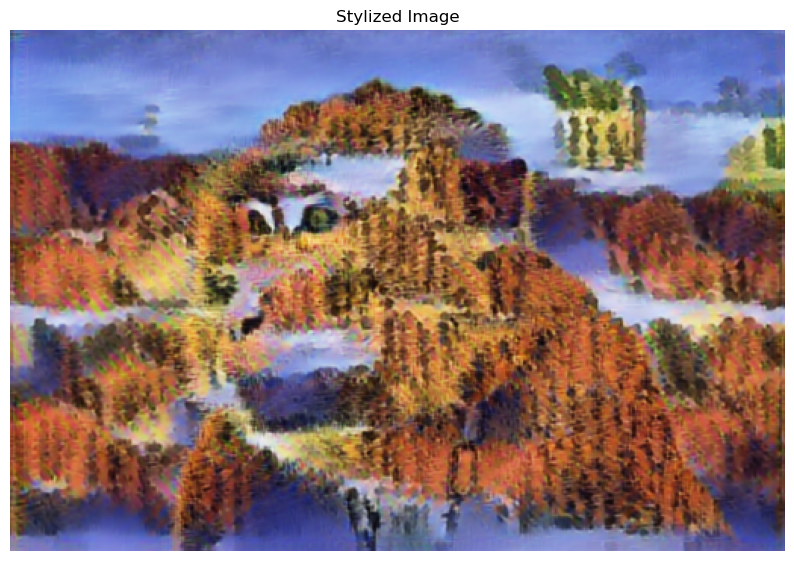

In [10]:
monkey_content = "monkey.jpg"
landscape_style = "landscape.jpg"
create_stylized_image(monkey_content, landscape_style)

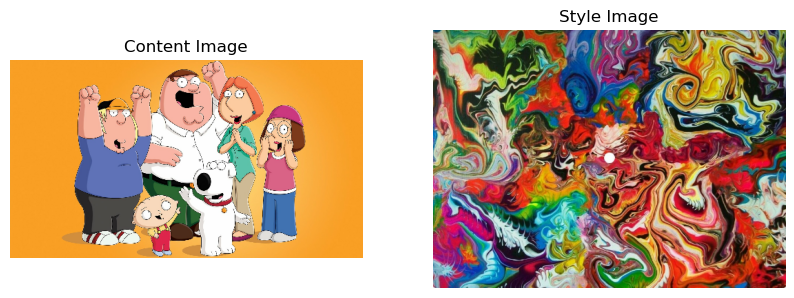

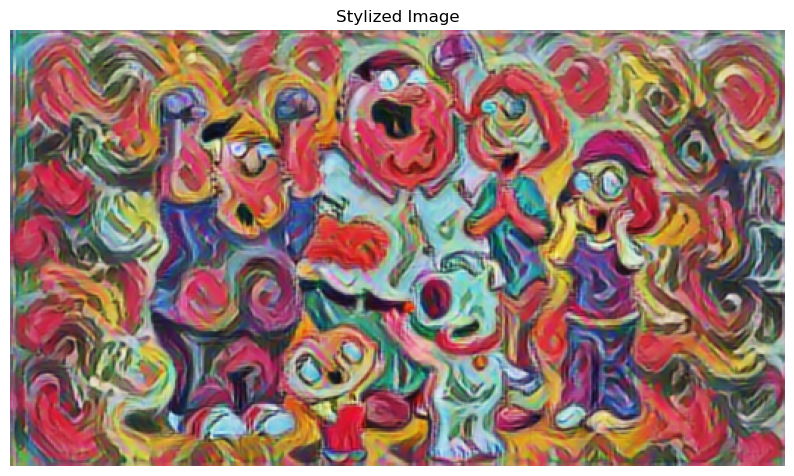

In [11]:
family_guy_content = "family_guy.jpg"
abstract_style = "abstract_art.jpg"
create_stylized_image(family_guy_content, abstract_style)

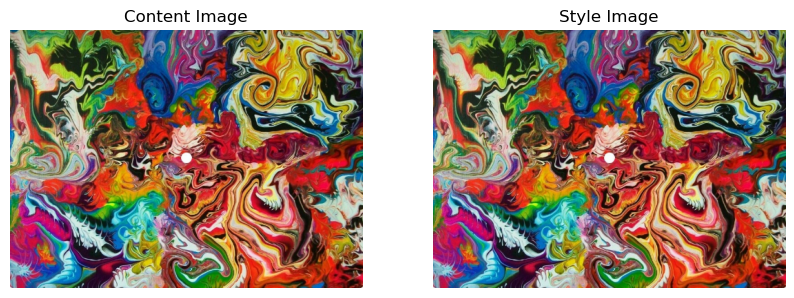

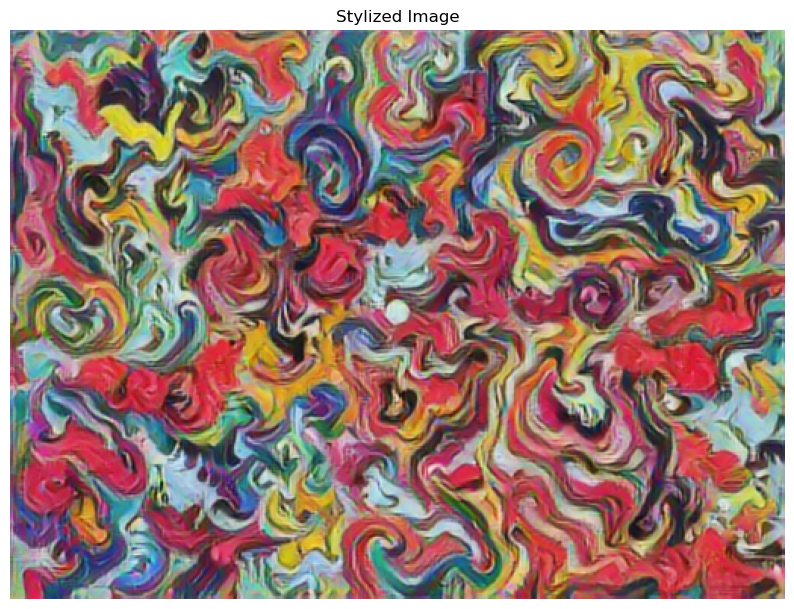

In [12]:
abstract_style = "abstract_art.jpg"
create_stylized_image(abstract_style, abstract_style)

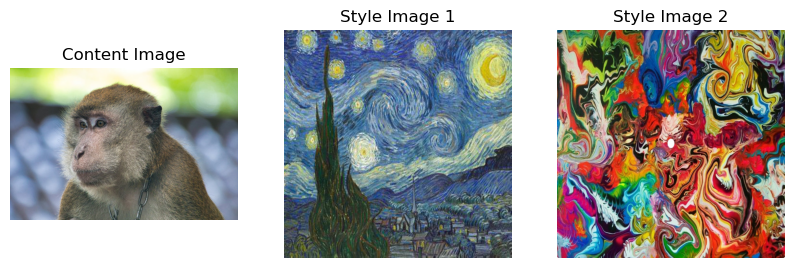

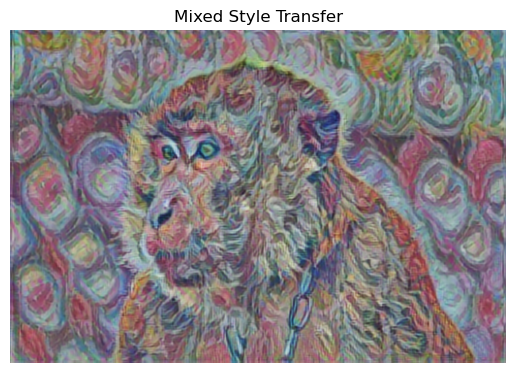

In [21]:
style_image1 = load_img('van_gogh.jpg',  target_size=(512, 512))
style_image2 = load_img('abstract_art.jpg',  target_size=(512, 512))
content_image = load_img('monkey.jpg')

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
imshow(content_image, 'Content Image')
plt.subplot(1,3,2)
imshow(style_image1, 'Style Image 1')
plt.subplot(1,3,3)
imshow(style_image2, 'Style Image 2')

blended_style = (style_image1 + style_image2) / 2.0

hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_module(content_image, blended_style)[0]

plt.figure()
imshow(stylized_image, 'Mixed Style Transfer')